In [1]:
import numpy as np
import pandas as pd
import SimpleITK as sitk # For reading .mhd/.raw files
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob # For finding file paths

In [12]:
LUNA16_DATA_PATH = '/kaggle/input/luna-16/Dataset'
SUBSET_PATHS = sorted(glob.glob(os.path.join(LUNA16_DATA_PATH, 'subset*/subset*')))
ANNOTATIONS_PATH = os.path.join(LUNA16_DATA_PATH, 'annotations.csv')
CANDIDATES_PATH = os.path.join(LUNA16_DATA_PATH, 'candidates.csv') # If available

print(f"Number of subsets found: {len(SUBSET_PATHS)}")
print(f"Annotations file exists: {os.path.exists(ANNOTATIONS_PATH)}")
if os.path.exists(CANDIDATES_PATH):
    print(f"Candidates file exists: {os.path.exists(CANDIDATES_PATH)}")
else:
     print("Candidates file not found, proceeding with annotations.csv only for confirmed nodules.")


Number of subsets found: 10
Annotations file exists: True
Candidates file exists: True


In [44]:
import pandas as pd

# --- Count Positive Samples ---
print("Counting positive samples (nodules)...")
positive_count = 0

# Iterate through the annotations (df_annos) and count positive samples
if not df_annos.empty:
    positive_count = len(df_annos)
    print(f"Found {positive_count} positive samples (nodules).")
else:
    print("No positive samples found in the annotations.")

# --- Count Negative Samples ---
print("Counting negative samples (non-nodules)...")
negative_count = 0

# Load the candidates.csv file for negative samples
CANDIDATES_PATH = os.path.join(LUNA16_DATA_PATH, 'candidates.csv')

try:
    df_candidates = pd.read_csv(CANDIDATES_PATH)
    # Filter for negative samples (class == 0)
    negative_candidates = df_candidates[df_candidates['class'] == 0]
    negative_count = len(negative_candidates)
    print(f"Found {negative_count} negative samples (non-nodules).")
except Exception as e:
    print(f"Error loading candidates.csv: {e}")

# --- Summary ---
print("\n--- Summary ---")
print(f"Total positive samples: {positive_count}")
print(f"Total negative samples: {negative_count}")


Counting positive samples (nodules)...
Found 1186 positive samples (nodules).
Counting negative samples (non-nodules)...
Found 549714 negative samples (non-nodules).

--- Summary ---
Total positive samples: 1186
Total negative samples: 549714


In [45]:
import pandas as pd

# --- Count Number of Scans for Positive Samples ---
print("Counting number of scans for positive samples (nodules)...")
positive_scans = 0

# Iterate through the annotations (df_annos) and count unique seriesuid values (scans)
if not df_annos.empty:
    positive_scans = df_annos['seriesuid'].nunique()  # Count distinct scans
    print(f"Found {positive_scans} unique scans with positive samples (nodules).")
else:
    print("No positive samples found in the annotations.")

# --- Count Number of Scans for Negative Samples ---
print("Counting number of scans for negative samples (non-nodules)...")
negative_scans = 0

# Load the candidates.csv file for negative samples
CANDIDATES_PATH = os.path.join(LUNA16_DATA_PATH, 'candidates.csv')

try:
    df_candidates = pd.read_csv(CANDIDATES_PATH)
    # Filter for negative samples (class == 0)
    negative_candidates = df_candidates[df_candidates['class'] == 0]
    
    # Count the unique scans (seriesuid) for negative candidates
    negative_scans = negative_candidates['seriesuid'].nunique()
    print(f"Found {negative_scans} unique scans with negative samples (non-nodules).")
except Exception as e:
    print(f"Error loading candidates.csv: {e}")

# --- Summary ---
print("\n--- Summary ---")
print(f"Total unique positive scans: {positive_scans}")
print(f"Total unique negative scans: {negative_scans}")


Counting number of scans for positive samples (nodules)...
Found 601 unique scans with positive samples (nodules).
Counting number of scans for negative samples (non-nodules)...
Found 888 unique scans with negative samples (non-nodules).

--- Summary ---
Total unique positive scans: 601
Total unique negative scans: 888


In [47]:
import os

# --- Count Total Number of Raw Scans (.mhd files) ---
print("Counting total number of raw scans (.mhd files) in subsets...")

# Initialize counters for the total number of scans
total_scans = 0
positive_scan_files = set()  # Set to track raw scans with positive annotations

# Loop through each subset path to count the number of .mhd files
for subset_path in SUBSET_PATHS:
    # List all files in the subset directory
    subset_files = os.listdir(subset_path)
    
    # Count only .mhd files (raw scans)
    mhd_files = [f for f in subset_files if f.endswith('.mhd')]
    total_scans += len(mhd_files)
    
    # Track positive scan files
    for mhd_file in mhd_files:
        seriesuid = mhd_file.split('.')[0]  # Assuming the filename starts with seriesuid
        if seriesuid in df_annos['seriesuid'].values:
            positive_scan_files.add(seriesuid)

# Print the number of raw scans and how many are positive
print(f"Total number of raw scans (.mhd files) across subsets: {total_scans}")
print(f"Total number of raw scans with positive annotations: {len(positive_scan_files)}")

# --- Summary ---
print("\n--- Summary ---")
print(f"Total unique positive scans: {positive_scans}")
print(f"Total unique negative scans: {negative_scans}")
print(f"Total raw scans in subsets: {total_scans}")
print(f"Total positive raw scans in subsets: {len(positive_scan_files)}")


Counting total number of raw scans (.mhd files) in subsets...
Total number of raw scans (.mhd files) across subsets: 888
Total number of raw scans with positive annotations: 0

--- Summary ---
Total unique positive scans: 601
Total unique negative scans: 888
Total raw scans in subsets: 888
Total positive raw scans in subsets: 0


In [13]:
try:
    df_annos = pd.read_csv(ANNOTATIONS_PATH)
    print("Annotations loaded successfully:")
    print(f"Shape: {df_annos.shape}")
    print(df_annos.head())

    # Check for missing values
    print("\nMissing values in annotations:")
    print(df_annos.isnull().sum())

except FileNotFoundError:
    print(f"Error: Annotations file not found at {ANNOTATIONS_PATH}")
    df_annos = pd.DataFrame() # Create empty dataframe if file not found


Annotations loaded successfully:
Shape: (1186, 5)
                                           seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...   69.639017 -140.944586   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  -24.013824  192.102405   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...    2.441547  172.464881   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  
2  876.374496     5.786348  
3 -391.081276     8.143262  
4 -405.493732    18.545150  

Missing values in annotations:
seriesuid      0
coordX         0
coordY         0
coordZ         0
diameter_mm    0
dtype: int64


In [14]:
df_cands = None
if os.path.exists(CANDIDATES_PATH):
    try:
        df_cands = pd.read_csv(CANDIDATES_PATH)
        print("\nCandidates loaded successfully:")
        print(f"Shape: {df_cands.shape}")
        print(df_cands.head())
        print("\nMissing values in candidates:")
        print(df_cands.isnull().sum())
    except FileNotFoundError:
        print(f"Warning: Candidates file specified but not found at {CANDIDATES_PATH}")



Candidates loaded successfully:
Shape: (551065, 5)
                                           seriesuid  coordX  coordY  coordZ  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -56.08  -67.85 -311.92   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   53.21 -244.41 -245.17   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.66 -121.80 -286.62   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -33.66  -72.75 -308.41   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -32.25  -85.36 -362.51   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  

Missing values in candidates:
seriesuid    0
coordX       0
coordY       0
coordZ       0
class        0
dtype: int64



Annotation Statistics:
            coordX       coordY       coordZ  diameter_mm
count  1186.000000  1186.000000  1186.000000  1186.000000
mean     -5.067547     8.428113  -160.159029     8.306527
std      84.468115    98.316003   279.829437     4.762033
min    -164.351031  -283.834336  -790.074799     3.253443
25%     -80.909225   -51.549643  -221.197808     5.107177
50%     -32.855132    18.787926  -167.615160     6.433600
75%      76.830069    67.245915  -109.735281     9.696301
max     164.763985   271.405521  1790.494057    32.270030


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


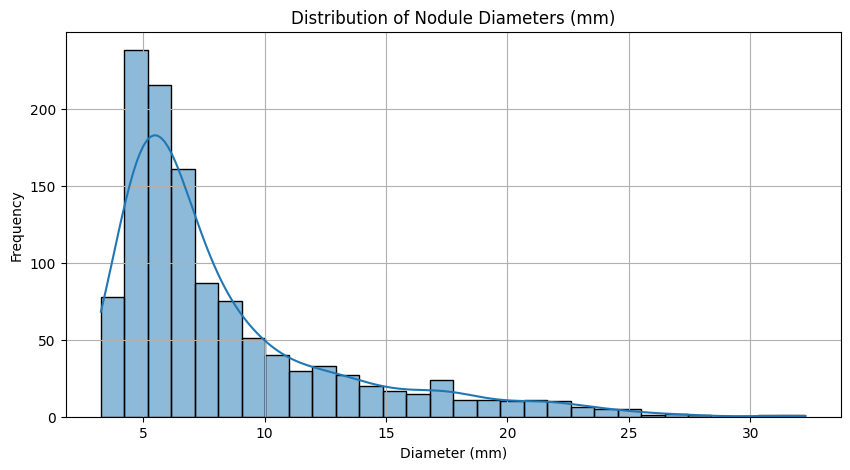


Scans with nodules: 601
Average nodules per scan (for scans with nodules): 1.97


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


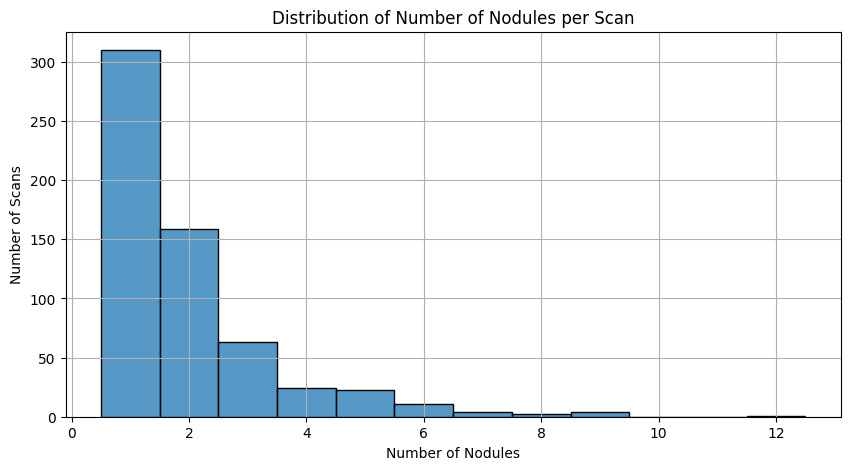

In [15]:
if not df_annos.empty:
    print("\nAnnotation Statistics:")
    print(df_annos.describe())

    # Plot distribution of nodule diameters
    plt.figure(figsize=(10, 5))
    sns.histplot(df_annos['diameter_mm'], bins=30, kde=True)
    plt.title('Distribution of Nodule Diameters (mm)')
    plt.xlabel('Diameter (mm)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Count nodules per scan
    nodules_per_scan = df_annos['seriesuid'].value_counts()
    print(f"\nScans with nodules: {len(nodules_per_scan)}")
    print(f"Average nodules per scan (for scans with nodules): {nodules_per_scan.mean():.2f}")

    plt.figure(figsize=(10, 5))
    sns.histplot(nodules_per_scan, bins=max(nodules_per_scan), discrete=True)
    plt.title('Distribution of Number of Nodules per Scan')
    plt.xlabel('Number of Nodules')
    plt.ylabel('Number of Scans')
    plt.grid(True)
    plt.show()

In [21]:
def load_itk_image(filename):
    """Loads a .mhd file using SimpleITK and returns the image array and metadata."""
    try:
        itkimage = sitk.ReadImage(filename)
        # Convert to numpy array (depth, height, width)
        image_array = sitk.GetArrayFromImage(itkimage)

        # Metadata: Origin (world coords of first voxel), Spacing (size of voxel), Direction (orientation)
        origin = np.array(itkimage.GetOrigin())
        spacing = np.array(itkimage.GetSpacing())
        direction = np.array(itkimage.GetDirection()).reshape(3, 3)

        return image_array, origin, spacing, direction  # <-- This was missing!

    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None  # Explicitly return None if an error occurs

In [23]:
def world_to_voxel(world_coords, origin, spacing, direction):
    """Converts world coordinates (x, y, z) to voxel coordinates (col, row, slice)."""

    # Ensure world_coords is a NumPy array
    world_coords = np.array(world_coords, dtype=np.float64)  
    if world_coords.shape != (3,):
        raise ValueError(f"Unexpected world coordinate shape: {world_coords.shape}, expected (3,)")

    # Check if Direction is identity or close to it
    is_identity_like = np.allclose(direction, np.identity(3)) or np.allclose(direction, np.diag([-1, -1, 1])) 

    if is_identity_like:
        voxel_coords = (world_coords - origin) / spacing
        return np.round(voxel_coords[[2, 1, 0]]).astype(int)
    else:
        print("Warning: Non-standard direction matrix encountered. Voxel conversion might need adjustment.")
        relative_coords = world_coords - origin
        voxel_coords_temp = np.linalg.inv(direction @ np.diag(spacing)) @ relative_coords
        return np.round(voxel_coords_temp[[2, 1, 0]]).astype(int)


In [18]:
def plot_slice_with_nodule(image_array, voxel_coords, diameter_mm, spacing):
    """Plots a 2D slice of the CT scan containing the nodule center."""
    slice_idx, row_idx, col_idx = voxel_coords

    # Ensure indices are within bounds
    slice_idx = np.clip(slice_idx, 0, image_array.shape[0] - 1)
    row_idx = np.clip(row_idx, 0, image_array.shape[1] - 1)
    col_idx = np.clip(col_idx, 0, image_array.shape[2] - 1)

    # Get the 2D slice (it's a Y-Z plane if we index with col_idx, X-Z if row_idx, X-Y if slice_idx)
    # Let's plot the axial slice (X-Y plane) at the nodule's Z coordinate
    axial_slice = image_array[slice_idx, :, :]

    plt.figure(figsize=(8, 8))
    plt.imshow(axial_slice, cmap=plt.cm.gray)
    plt.title(f'Axial Slice (Z={slice_idx}) with Nodule Center')
    plt.xlabel('X (col)')
    plt.ylabel('Y (row)')

    # Calculate radius in pixels (approximate, use average spacing for simplicity)
    # Use spacing corresponding to the slice axes (x, y) -> spacing[0], spacing[1]
    radius_pixels_x = (diameter_mm / 2.0) / spacing[0]
    radius_pixels_y = (diameter_mm / 2.0) / spacing[1]
    # Average radius for circular marker
    avg_radius_pixels = (radius_pixels_x + radius_pixels_y) / 2.0

    # Draw a circle marker at the nodule center (col_idx, row_idx)
    # Note: plt.scatter uses (x, y) coordinates, corresponding to (col, row) indices
    circle = plt.Circle((col_idx, row_idx), avg_radius_pixels, color='r', fill=False, linewidth=2)
    plt.gca().add_patch(circle)
    plt.scatter(col_idx, row_idx, color='r', marker='+', s=100) # Mark center
    plt.show()

Visualizing nodule from scan: 1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
World Coordinates (x,y,z): [-128.6994211 -175.3192718 -298.3875064]
Diameter: 5.651470635 mm
Loading image file: /kaggle/input/luna-16/Dataset/subset8/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd
Image shape (D, H, W): (194, 512, 512)
Origin: [-157.67773 -311.67773 -438.4    ]
Spacing: [0.64453125 0.64453125 1.79999995]
Voxel Coordinates (slice, row, col): [ 78 212  45]


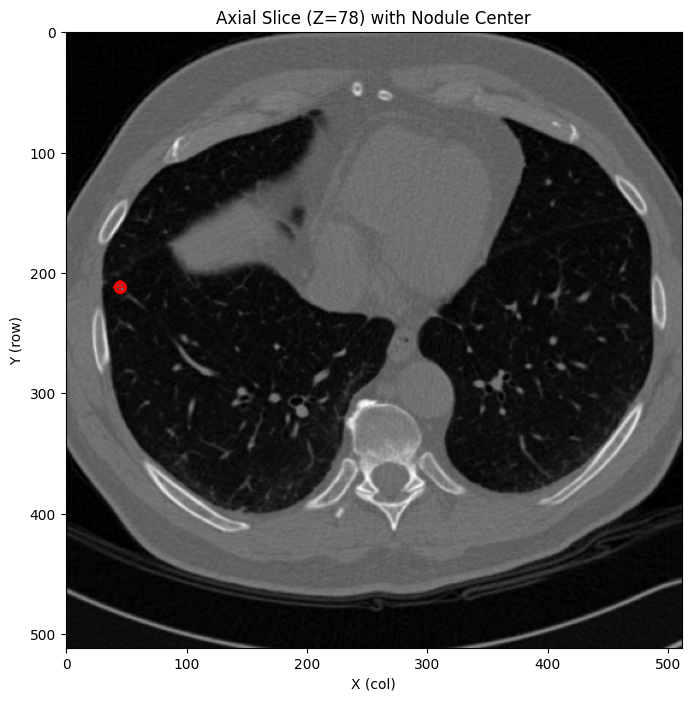

In [24]:
if not df_annos.empty:
    # Get the first annotation
    sample_annotation = df_annos.iloc[0]
    seriesuid = sample_annotation['seriesuid']
    world_coords = sample_annotation[['coordX', 'coordY', 'coordZ']].values
    diameter = sample_annotation['diameter_mm']

    print(f"Visualizing nodule from scan: {seriesuid}")
    print(f"World Coordinates (x,y,z): {world_coords}")
    print(f"Diameter: {diameter} mm")

    # Find the corresponding .mhd file
    mhd_file = None
    for subset_path in SUBSET_PATHS:
        potential_file = os.path.join(subset_path, f"{seriesuid}.mhd")
        if os.path.exists(potential_file):
            mhd_file = potential_file
            break

    if mhd_file:
        print(f"Loading image file: {mhd_file}")
        image_array, origin, spacing, direction = load_itk_image(mhd_file)
        print(f"Image shape (D, H, W): {image_array.shape}")
        print(f"Origin: {origin}")
        print(f"Spacing: {spacing}")
        # print(f"Direction Matrix:\n{direction}") # Optional: print direction matrix

        # Convert world coordinates to voxel coordinates
        voxel_coords = world_to_voxel(world_coords, origin, spacing, direction)
        print(f"Voxel Coordinates (slice, row, col): {voxel_coords}")

        # Plot the relevant slice
        plot_slice_with_nodule(image_array, voxel_coords, diameter, spacing)
    else:
        print(f"Error: Could not find .mhd file for seriesuid {seriesuid}")
else:
    print("No annotations loaded, skipping visualization example.")

In [25]:
from scipy.ndimage import zoom

def resample_image(image_array, spacing, new_spacing=[1, 1, 1]):
    """Resamples the image to a new spacing."""
    resize_factor = spacing / new_spacing
    new_real_shape = image_array.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image_array.shape
    new_spacing = spacing / real_resize_factor

    # Use spline interpolation (order=1 for linear, order=3 for cubic)
    resampled_image = zoom(image_array, real_resize_factor, order=1)

    return resampled_image, new_spacing

Original shape: (194, 512, 512), Original spacing: [0.64453125 0.64453125 1.79999995]
Resampled shape: (125, 330, 922), New spacing: [1.0003125  1.         0.99956613]


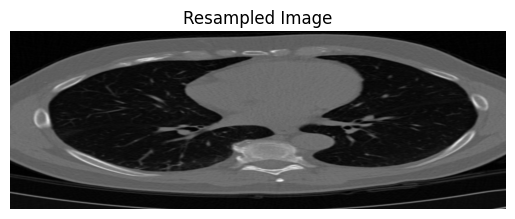

In [27]:
# Example: Resample the previously loaded image
if 'image_array' in locals():
    print(f"Original shape: {image_array.shape}, Original spacing: {spacing}")
    
    # Resampling
    resampled_img, new_spacing_actual = resample_image(image_array, spacing, new_spacing=[1, 1, 1])
    
    print(f"Resampled shape: {resampled_img.shape}, New spacing: {new_spacing_actual}")
    
    # Visualization
    def visualize_resampled(image, title="Resampled Image"):
        mid_slice = image.shape[0] // 2  # Choose the middle slice
        plt.imshow(image[mid_slice, :, :], cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    
    visualize_resampled(resampled_img)

else:
    print("Skipping resampling example as no image was loaded.")

In [28]:
def normalize_hu(image_array):
    """Normalizes HU values."""
    # Typical range for lung tissue/nodules
    MIN_BOUND = -1000.0
    MAX_BOUND = 400.0
    image_array = np.clip(image_array, MIN_BOUND, MAX_BOUND)

    # Normalize to [0, 1]
    image_array = (image_array - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    return image_array.astype(np.float32)

Original shape: (194, 512, 512), Original spacing: [0.64453125 0.64453125 1.79999995]
Resampled shape: (125, 330, 922), New spacing: [1.0003125  1.         0.99956613]
Normalized image min/max: 0.0, 1.0


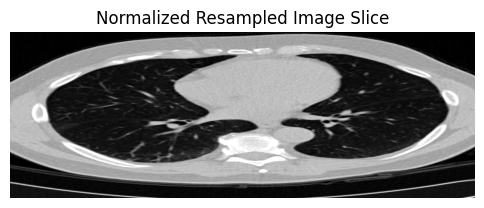

In [30]:
def visualize_image(image, title="Image Slice"):
    """Displays the middle slice of a 3D image."""
    mid_slice = image.shape[0] // 2  # Choose the middle slice
    plt.figure(figsize=(6,6))
    plt.imshow(image[mid_slice, :, :], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
if 'image_array' in locals():
    print(f"Original shape: {image_array.shape}, Original spacing: {spacing}")

    # Step 1: Resample
    resampled_img, new_spacing_actual = resample_image(image_array, spacing, new_spacing=[1, 1, 1])
    print(f"Resampled shape: {resampled_img.shape}, New spacing: {new_spacing_actual}")

    # Step 2: Normalize HU values
    normalized_img = normalize_hu(resampled_img)
    print(f"Normalized image min/max: {normalized_img.min()}, {normalized_img.max()}")

    # Step 3: Visualize
    visualize_image(normalized_img, title="Normalized Resampled Image Slice")

else:
    print("Skipping processing as no image was loaded.")

In [31]:
def simple_lung_segmentation(image_array):
    """Very basic lung segmentation using thresholding."""
    # Assumes input image is already normalized (values between 0 and 1)
    # Thresholding air (-1000 HU maps to 0) and dense tissue (400 HU maps to 1)
    # Lungs are mostly air, so we look for low intensity values after normalization
    segmented = np.where(image_array > 0.25, 1.0, 0.0)  # Crude threshold

    print("Warning: Using very basic lung segmentation.")
    return segmented * image_array  # Mask the original image

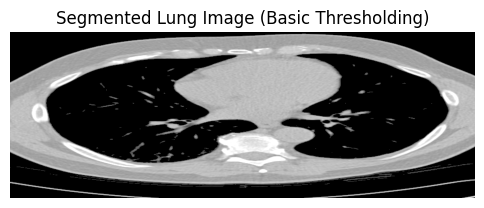

In [32]:
# Example usage
if 'normalized_img' in locals():
    # Step 1: Perform segmentation
    segmented_img = simple_lung_segmentation(normalized_img)
    
    # Step 2: Visualize the segmented lungs
    visualize_image(segmented_img, title="Segmented Lung Image (Basic Thresholding)")

else:
    print("Skipping segmentation example.")

In [34]:
def extract_patch(image_array, voxel_coords, patch_size=(64, 64, 64)):
    """Extracts a 3D patch centered at voxel_coords."""
    patch_z, patch_y, patch_x = patch_size
    cz, cy, cx = voxel_coords

    # Calculate start and end indices for slicing, handling boundaries
    start_z = max(0, cz - patch_z // 2)
    end_z = min(image_array.shape[0], cz + (patch_z + 1) // 2)
    start_y = max(0, cy - patch_y // 2)
    end_y = min(image_array.shape[1], cy + (patch_y + 1) // 2)
    start_x = max(0, cx - patch_x // 2)
    end_x = min(image_array.shape[2], cx + (patch_x + 1) // 2)

    patch = image_array[start_z:end_z, start_y:end_y, start_x:end_x]

    # Pad if the patch is smaller than desired size (due to boundary proximity)
    pad_z = patch_size[0] - patch.shape[0]
    pad_y = patch_size[1] - patch.shape[1]
    pad_x = patch_size[2] - patch.shape[2]

    pad_width = ((pad_z // 2, (pad_z + 1) // 2), # Before/After padding for Z
                 (pad_y // 2, (pad_y + 1) // 2), # Before/After padding for Y
                 (pad_x // 2, (pad_x + 1) // 2)) # Before/After padding for X

    # Use a constant padding value, e.g., the minimum value of the image or 0 if normalized
    pad_value = np.min(image_array) # Or 0 if normalized [0,1]
    patch = np.pad(patch, pad_width, mode='constant', constant_values=pad_value)

    return patch

In [36]:
PATCH_SIZE = (48, 48, 48) # Example patch size (z, y, x)
TARGET_SPACING = np.array([1.0, 1.0, 1.0]) # Target isotropic spacing in mm

positive_patches = []
negative_patches = []
labels = [] # 1 for nodule, 0 for non-nodule

# --- Process Positive Samples (from annotations.csv) ---
print("Processing positive samples (nodules)...")
processed_scans = 0
total_scans = len(df_annos)  # Total number of scans to process

if not df_annos.empty:
    for idx, row in df_annos.iterrows():
        seriesuid = row['seriesuid']
        world_coords = row[['coordX', 'coordY', 'coordZ']].values
        diameter = row['diameter_mm']

        # Find and load the image
        mhd_file = None
        for subset_path in SUBSET_PATHS:
            potential_file = os.path.join(subset_path, f"{seriesuid}.mhd")
            if os.path.exists(potential_file):
                mhd_file = potential_file
                break

        if not mhd_file: continue  # Skip if file not found

        try:
            image_array, origin, spacing, direction = load_itk_image(mhd_file)

            # Preprocess: Resample -> Normalize -> (Segment)
            resampled_img, new_spacing = resample_image(image_array, spacing, TARGET_SPACING)
            normalized_img = normalize_hu(resampled_img)
            # segmented_img = simple_lung_segmentation(normalized_img) # Optional

            # Adjust coordinates for resampling
            original_voxel_coords = world_to_voxel(world_coords, origin, spacing, direction)
            new_voxel_coords = world_to_voxel(world_coords, origin, new_spacing, direction)

            # Extract patch around the *new* voxel coordinates
            patch = extract_patch(normalized_img, new_voxel_coords, patch_size=PATCH_SIZE)
            positive_patches.append(patch)
            labels.append(1)
            processed_scans += 1

            # Print progress after each scan
            print(f"Processed {processed_scans}/{total_scans} scans...")

        except Exception as e:
            print(f"Error processing {seriesuid}: {e}")

    print(f"Processed {len(positive_patches)} positive patches from {processed_scans} scans.")

Processing positive samples (nodules)...
Processed 1/1186 scans...
Processed 2/1186 scans...
Processed 3/1186 scans...
Processed 4/1186 scans...
Processed 5/1186 scans...
Processed 6/1186 scans...
Processed 7/1186 scans...
Processed 8/1186 scans...
Processed 9/1186 scans...
Processed 10/1186 scans...
Processed 11/1186 scans...
Processed 12/1186 scans...
Processed 13/1186 scans...
Processed 14/1186 scans...
Processed 15/1186 scans...
Processed 16/1186 scans...
Processed 17/1186 scans...
Processed 18/1186 scans...
Processed 19/1186 scans...
Processed 20/1186 scans...
Processed 21/1186 scans...
Processed 22/1186 scans...
Processed 23/1186 scans...
Processed 24/1186 scans...
Processed 25/1186 scans...
Processed 26/1186 scans...
Processed 27/1186 scans...
Processed 28/1186 scans...
Processed 29/1186 scans...
Processed 30/1186 scans...
Processed 31/1186 scans...
Processed 32/1186 scans...
Processed 33/1186 scans...
Processed 34/1186 scans...
Processed 35/1186 scans...
Processed 36/1186 scans

In [53]:
df_candidates = pd.read_csv(CANDIDATES_PATH)
print("Processing negative samples (non-nodules)...")
negative_patches = []
processed_neg_scans = 0

if not df_candidates.empty:
    negative_candidates = df_candidates[df_candidates['class'] == 0]  # Filter non-nodules
    total_neg_samples = len(negative_candidates)  # Total negatives to process

    for idx, row in negative_candidates.iterrows():
        seriesuid = row['seriesuid']
        world_coords = row[['coordX', 'coordY', 'coordZ']].values

        # Find and load the image
        mhd_file = None
        for subset_path in SUBSET_PATHS:
            potential_file = os.path.join(subset_path, f"{seriesuid}.mhd")
            if os.path.exists(potential_file):
                mhd_file = potential_file
                break

        if not mhd_file: continue  # Skip if file not found

        try:
            image_array, origin, spacing, direction = load_itk_image(mhd_file)

            # Preprocess: Resample -> Normalize
            resampled_img, new_spacing = resample_image(image_array, spacing, TARGET_SPACING)
            normalized_img = normalize_hu(resampled_img)

            # Adjust coordinates
            new_voxel_coords = world_to_voxel(world_coords, origin, new_spacing, direction)

            # Extract patch
            patch = extract_patch(normalized_img, new_voxel_coords, patch_size=PATCH_SIZE)
            negative_patches.append(patch)
            processed_neg_scans += 1

            # Print progress
            if processed_neg_scans % 10 == 0:  # Print every 10 samples
                print(f"Processed {processed_neg_scans}/{total_neg_samples} negative samples...")

        except Exception as e:
            print(f"Error processing {seriesuid}: {e}")

    print(f"Processed {len(negative_patches)} negative patches from {processed_neg_scans} scans.")


Processing negative samples (non-nodules)...
Processed 10/549714 negative samples...
Processed 20/549714 negative samples...
Processed 30/549714 negative samples...
Processed 40/549714 negative samples...
Processed 50/549714 negative samples...
Processed 60/549714 negative samples...
Processed 70/549714 negative samples...
Processed 80/549714 negative samples...
Processed 90/549714 negative samples...
Processed 100/549714 negative samples...
Processed 110/549714 negative samples...
Processed 120/549714 negative samples...
Processed 130/549714 negative samples...
Processed 140/549714 negative samples...
Processed 150/549714 negative samples...
Processed 160/549714 negative samples...
Processed 170/549714 negative samples...
Processed 180/549714 negative samples...
Processed 190/549714 negative samples...
Processed 200/549714 negative samples...
Processed 210/549714 negative samples...
Processed 220/549714 negative samples...
Processed 230/549714 negative samples...
Processed 240/549714 

KeyboardInterrupt: 

In [54]:
df_candidates = pd.read_csv(CANDIDATES_PATH)
print("Processing negative samples (non-nodules)...")
negative_patches = []
processed_neg_scans = 0

if not df_candidates.empty:
    negative_candidates = df_candidates[df_candidates['class'] == 0]  # Filter non-nodules
    total_neg_samples = len(negative_candidates)  # Total negatives to process

    # Set a limit of 20 samples
    max_samples = 20

    for idx, row in negative_candidates.iterrows():
        if processed_neg_scans >= max_samples:
            break  # Stop after processing 20 samples

        seriesuid = row['seriesuid']
        world_coords = row[['coordX', 'coordY', 'coordZ']].values

        # Find and load the image
        mhd_file = None
        for subset_path in SUBSET_PATHS:
            potential_file = os.path.join(subset_path, f"{seriesuid}.mhd")
            if os.path.exists(potential_file):
                mhd_file = potential_file
                break

        if not mhd_file:
            continue  # Skip if file not found

        try:
            image_array, origin, spacing, direction = load_itk_image(mhd_file)

            # Preprocess: Resample -> Normalize
            resampled_img, new_spacing = resample_image(image_array, spacing, TARGET_SPACING)
            normalized_img = normalize_hu(resampled_img)

            # Adjust coordinates
            new_voxel_coords = world_to_voxel(world_coords, origin, new_spacing, direction)

            # Extract patch
            patch = extract_patch(normalized_img, new_voxel_coords, patch_size=PATCH_SIZE)
            negative_patches.append(patch)
            processed_neg_scans += 1

            # Print progress
            if processed_neg_scans % 10 == 0:  # Print every 10 samples
                print(f"Processed {processed_neg_scans}/{total_neg_samples} negative samples...")

        except Exception as e:
            print(f"Error processing {seriesuid}: {e}")

    print(f"Processed {len(negative_patches)} negative patches from {processed_neg_scans} scans.")


Processing negative samples (non-nodules)...
Processed 10/549714 negative samples...
Processed 20/549714 negative samples...
Processed 20 negative patches from 20 scans.


In [58]:
# Create the labels for the positive and negative patches
positive_labels = np.ones(num_positive_patches)  # All positive patches have label 1
negative_labels = np.zeros(num_negative_patches)  # All negative patches have label 0

# Combine the patches and labels
X = np.array(positive_patches + negative_patches)
y = np.concatenate([positive_labels, negative_labels])  # Combine labels for both positive and negative patches

# Ensure y is an integer type before using np.bincount
y = y.astype(int)

# Add channel dimension for DL models (e.g., TensorFlow/Keras: samples, z, y, x, channels)
X = np.expand_dims(X, axis=-1)

# Print dataset details
print(f"Number of positive patches: {num_positive_patches}")
print(f"Number of negative patches: {num_negative_patches}")
print(f"Final dataset shape: X={X.shape}, y={y.shape}")
print(f"Class distribution: {np.bincount(y)}")


Number of positive patches: 1162
Number of negative patches: 20
Final dataset shape: X=(1182, 48, 48, 48, 1), y=(1182,)
Class distribution: [  20 1162]


In [55]:
# --- Process Negative Samples ---
# This is more complex. Need to sample locations *away* from known nodules.
# Options:
# 1. Use `candidates.csv` 'class 0' entries if available.
# 2. Randomly sample locations within the lung masks (if segmentation is done).
# 3. Randomly sample locations and check distance from known nodules.
# Aim for a balanced or slightly majority-negative dataset (e.g., 1:1 or 1:3 positive:negative ratio).

print("Negative sampling needs implementation (using candidates.csv or random sampling).")
# Placeholder: Assume we have generated 'negative_patches' somehow
# negative_patches = [...]
# labels.extend([0] * len(negative_patches))

# Combine and shuffle
X = np.array(positive_patches + negative_patches)
y = np.array(labels)

# Add channel dimension for DL models (e.g., TensorFlow/Keras: samples, z, y, x, channels)
X = np.expand_dims(X, axis=-1)

print(f"Final dataset shape: X={X.shape}, y={y.shape}")
print(f"Class distribution: {np.bincount(y)}")

Negative sampling needs implementation (using candidates.csv or random sampling).
Final dataset shape: X=(1182, 48, 48, 48, 1), y=(1162,)
Class distribution: [   0 1162]


In [37]:
import numpy as np

# Save the positive patches, negative patches, and labels as .npy files
np.save('/kaggle/working/positive_patches.npy', positive_patches)
np.save('/kaggle/working/negative_patches.npy', negative_patches)
np.save('/kaggle/working/labels.npy', labels)

print("Preprocessing results saved.")


Preprocessing results saved.


In [ ]:
#positive_patches = np.load('positive_patches.npy')
#negative_patches = np.load('negative_patches.npy')
#labels = np.load('labels.npy')

In [59]:
from sklearn.model_selection import train_test_split

# Ensure X and y are defined
if 'X' in locals() and 'y' in locals() and len(X) > 0:
    # Split the dataset into training, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val  # Adjusted split ratio
    )
    
    # Print the shapes of the splits
    print(f"Train set: {X_train.shape}, {y_train.shape}")
    print(f"Validation set: {X_val.shape}, {y_val.shape}")
    print(f"Test set: {X_test.shape}, {y_test.shape}")
else:
    print("X and y are not defined. Skipping data splitting.")


Train set: (853, 48, 48, 48, 1), (853,)
Validation set: (151, 48, 48, 48, 1), (151,)
Test set: (178, 48, 48, 48, 1), (178,)


In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_3d_cnn(input_shape, num_classes=1): # num_classes=1 for binary (sigmoid output)
    """Builds a simple 3D CNN model."""
    model = models.Sequential(name="3D_CNN")

    model.add(layers.Input(shape=input_shape))

    # Block 1
    model.add(layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))

    # Block 2
    model.add(layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))

    # Block 3
    model.add(layers.Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Output Layer
    # Use 'sigmoid' for binary classification
    output_activation = 'sigmoid' if num_classes == 1 else 'softmax'
    model.add(layers.Dense(num_classes, activation=output_activation))

    return model

In [61]:
if 'X_train' in locals() and len(X_train) > 0:
    INPUT_SHAPE = X_train.shape[1:] # (z, y, x, channels)
    model = build_3d_cnn(INPUT_SHAPE)
    model.summary()
else:
     print("Skipping model instantiation as training data is not ready.")
     # Define dummy shape if needed for subsequent cells
     # INPUT_SHAPE = (PATCH_SIZE[0], PATCH_SIZE[1], PATCH_SIZE[2], 1)
     # model = build_3d_cnn(INPUT_SHAPE)
     # model.summary()

Model: "3D_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 48, 48, 48, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 48, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 24, 24, 24, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 24, 24, 24, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 24, 64)      │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 12, 12, 12, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 12, 12, 12, 128)     │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 12, 128)     │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 6, 6, 6, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 27648)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,539,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,825,857 (14.59 MB)

 Trainable params: 3,825,409 (14.59 MB)

 Non-trainable params: 448 (1.75 KB)

In [62]:
# ### 3.2 Compile the Model
# Choose an optimizer, loss function, and metrics. Use binary cross-entropy for binary classification.

if 'model' in locals():
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    loss = tf.keras.losses.BinaryCrossentropy()
    metrics = [
         'accuracy',
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall'),
         tf.keras.metrics.AUC(name='auc')
     ]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    print("Model compiled successfully.")
else:
    print("Skipping model compilation as the model is not defined.")


Model compiled successfully.


Starting model training...
Epoch 1/2
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9697 - auc: 0.5753 - loss: 0.2763 - precision: 0.9854 - recall: 0.9837
Epoch 1: val_loss improved from inf to 0.26893, saving model to best_nodule_classifier.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 486s 9s/step - accuracy: 0.9697 - auc: 0.5752 - loss: 0.2767 - precision: 0.9854 - recall: 0.9837 - val_accuracy: 0.9801 - val_auc: 0.4381 - val_loss: 0.2689 - val_precision: 0.9801 - val_recall: 1.0000
Epoch 2/2
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9811 - auc: 0.5420 - loss: 0.2114 - precision: 0.9878 - recall: 0.9931
Epoch 2: val_loss improved from 0.26893 to 0.25571, saving model to best_nodule_classifier.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 477s 9s/step - accuracy: 0.9809 - auc: 0.5415 - loss: 0.2124 - precision: 0.9878 - recall: 0.9929 - val_accuracy: 0.9801 - val_auc: 0.5878 - val_loss: 0.2557 - val_precision: 0.9801 - val_recall: 1.0000
Restoring model weights from the end of the best epoch: 2

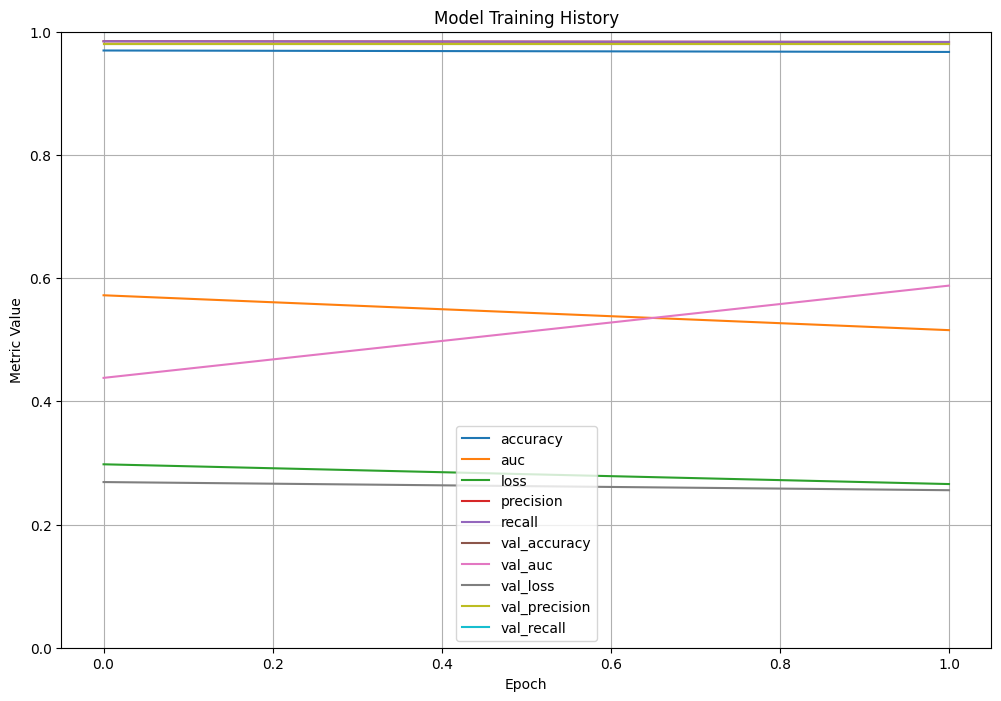

In [64]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

EPOCHS = 2 # Adjust as needed
BATCH_SIZE = 16 # Adjust based on available memory

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/kaggle/working/best_nodule_classifier.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# Check if training data exists before fitting
if 'X_train' in locals() and 'y_train' in locals() and \
   'X_val' in locals() and 'y_val' in locals() and \
   len(X_train) > 0 and len(X_val) > 0 and 'model' in locals():

    print("Starting model training...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1 # Set to 1 or 2 for progress updates
    )
    print("Model training finished.")

    # Plot training history
    pd.DataFrame(history.history).plot(figsize=(12, 8))
    plt.title('Model Training History')
    plt.ylabel('Metric Value')
    plt.xlabel('Epoch')
    plt.ylim(0, 1) # Adjust ylim if necessary
    plt.grid(True)
    plt.show()

else:
    print("Skipping model training as data or model is not available.")
    history = None # Define history as None if training didn't run


Loading best saved model weights...

Evaluating model on the test set...
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9859 - auc: 0.5027 - loss: 0.2433 - precision: 0.9859 - recall: 1.0000

Test Set Evaluation Results:
Loss: 0.2480
Accuracy: 0.9831
Precision: 0.9831
Recall: 1.0000
AUC: 0.6400
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step

Classification Report:
                precision    recall  f1-score   support

Non-Nodule (0)       0.00      0.00      0.00         3
    Nodule (1)       0.98      1.00      0.99       175

      accuracy                           0.98       178
     macro avg       0.49      0.50      0.50       178
  weighted avg       0.97      0.98      0.97       178


Confusion Matrix:
[[  0   3]
 [  0 175]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


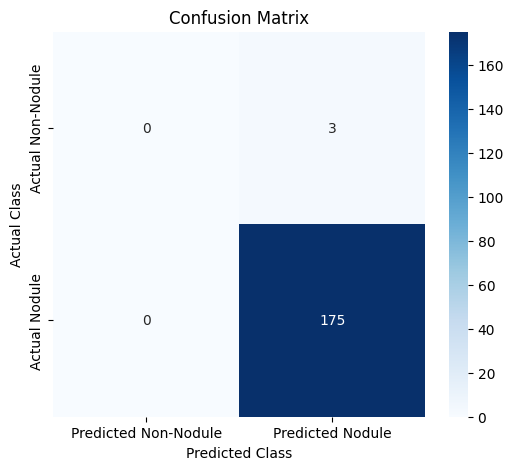

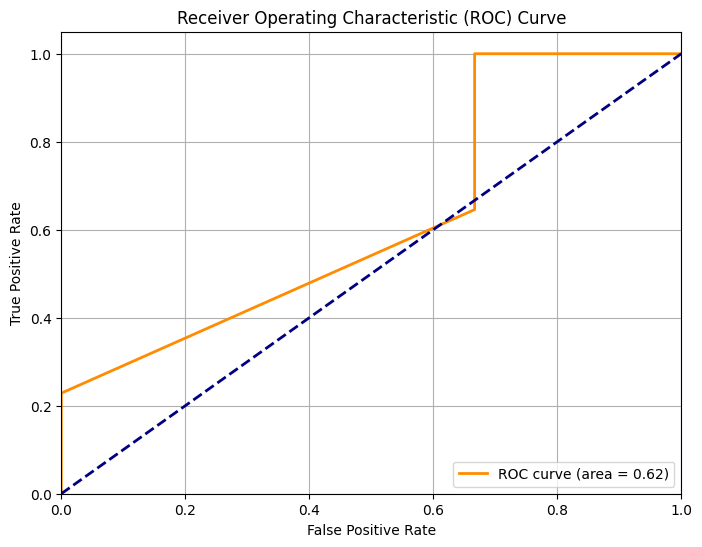

In [65]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

if os.path.exists('best_nodule_classifier.keras'):
     print("Loading best saved model weights...")
     model.load_weights('best_nodule_classifier.keras')

if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals() and len(X_test) > 0:
    print("\nEvaluating model on the test set...")
    results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

    print("\nTest Set Evaluation Results:")
    metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC'] 
    for name, value in zip(metric_names, results):
        print(f"{name}: {value:.4f}")
else:
    print("Skipping model evaluation as model or test data is not available.")

if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals() and len(X_test) > 0:
    y_pred_proba = model.predict(X_test, batch_size=BATCH_SIZE).flatten()
    y_pred_labels = (y_pred_proba > 0.5).astype(int)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_labels, target_names=['Non-Nodule (0)', 'Nodule (1)']))

    cm = confusion_matrix(y_test, y_pred_labels)
    print("\nConfusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Nodule', 'Predicted Nodule'],
                yticklabels=['Actual Non-Nodule', 'Actual Nodule'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

else:
    print("Skipping detailed evaluation as predictions could not be generated.")
